# IMPORTANT
1. Google Colab can only run 12 hours in each "session". So make sure you train and save your weights before the session ends

2. Google Colab might timeout if left idle, so its best to run the following script in Goole Chrome's console:
```
function ConnectButton(){
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click();
    console.log("Connect pushed"); 
}
setInterval(ConnectButton,60000);
```

3. Make sure to turn on GPU acceleration before running the model.

In [1]:
## READ THIS!

# please give this script a unique idenetifier, needed for data saving/retreival later
script_identifier = "productclass_jin_fastai-resnet50_20200621"

# location to the data zip file in Google Drive
data_zip_file = '/shopee_product_classification_original.zip' 

In [2]:
## READ THIS!

# you will need to define some functions to backup your models back to google drive
# the location of your models will depend on what library you are using.
# HENCE, please modify the following as necessary to fit the library's needs
# you can modify this after you've run your model and determined where it is saved at

def save_learner_models_to_googleDrive(train_path, script_identifier_custom=None):
  # check if user has provided script_identifier_custom
  if script_identifier_custom==None:
    script_identifier_custom = script_identifier
  
  # define the google drive location
  model_backup_googleDrive_path = "/content/drive/My Drive/modelBackup/{}/".format(script_identifier)
  !mkdir -p "{model_backup_googleDrive_path}"

  # copy "models" folder (learn.save) to Google Drive
  train_models_path = "{}/models/".format(train_path)
  !cp -r "{train_models_path}" "{model_backup_googleDrive_path}".
  print("Saved all models from {} to {}".format(train_models_path, model_backup_googleDrive_path))

  # copy exports (learn.export) to Google Drive
  train_exports_path = "{}/exports/".format(train_path)
  !cp -r "{train_exports_path}" "{model_backup_googleDrive_path}".
  print("Saved all exports from {} to {}".format(train_exports_path, model_backup_googleDrive_path))


def load_learner_models_from_googleDrive(train_path, script_identifier_custom=None):
  # check if user has provided script_identifier_custom
  if script_identifier_custom==None:
    script_identifier_custom = script_identifier

  # define the google drive location
  backup_googleDrive_path = "/content/drive/My Drive/modelBackup/{}/".format(script_identifier)

  # copy models
  backup_googleDrive_models_path = "{}models/".format(backup_googleDrive_path)
  !cp -r "{backup_googleDrive_models_path}" "{train_path}".

  # copy exports
  backup_googleDrive_exports_path = "{}exports/".format(backup_googleDrive_path)
  !cp -r "{backup_googleDrive_exports_path}" "{train_path}".

  print("Loded all models from {} to {}".format(backup_googleDrive_path, train_path))

In [3]:
# Jin's custom functions (for Google Drive import)

def prepare_colab_with_googleDrive_test_data(zip_file):
  # https://medium.com/datadriveninvestor/speed-up-your-image-training-on-google-colab-dc95ea1491cf
  # now, we will transfer the test/train data from Google Drive into Google Colab
  # this is crucial for speeding up the model training
  from datetime import datetime
  print("Started transfer process at:", datetime.now())

  # if zip_file begins with a "/", remove it
  if zip_file[0] == "/":
    zip_file = zip_file[1:]

  # copy the zip file from Google Drive into Colab's disk
  # NOTE: for a 10GB file, this step will take up to 10 mins
  print("Copying zip file (this may take a while) ...")
  zip_full_path = "/content/drive/My Drive/{}".format(zip_file)
  !cp "{zip_full_path}" .

  # unzip the copied file
  print("Unzipping...")
  !unzip -q "{zip_file}"

  # delete the zip (after unzipping), to save space
  print("Deleting zip file...")
  !rm "{zip_file}"

  print("Ended transfer process at:", datetime.now())


def export_learner(learn, name):  
  learn.save(name)

  !mkdir -p "{train_images_folderBunch}/exports"
  !mkdir -p "{train_images_folderBunch}/exports/{name}"
  learn.export('exports/{}/export.pkl'.format(name))

  save_learner_models_to_googleDrive(train_images_folderBunch)

In [4]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#prepare_colab_with_googleDrive_test_data(data_zip_file)

Started transfer process at: 2020-06-23 15:50:14.235689
Copying zip file (this may take a while) ...
^C
Unzipping...


In [5]:
!wget 'http://jinnotgin.com/shopee_product_classification_original.zip'

--2020-06-24 14:50:41--  http://jinnotgin.com/shopee_product_classification_original.zip
Resolving jinnotgin.com (jinnotgin.com)... 49.245.7.151
Connecting to jinnotgin.com (jinnotgin.com)|49.245.7.151|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://jinnotgin.com/shopee_product_classification_original.zip [following]
--2020-06-24 14:50:41--  https://jinnotgin.com/shopee_product_classification_original.zip
Connecting to jinnotgin.com (jinnotgin.com)|49.245.7.151|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10059257521 (9.4G) [application/zip]
Saving to: ‘shopee_product_classification_original.zip’

shopee_product_clas 100%[===================>]   9.37G  45.0MB/s    in 4m 47s  

2020-06-24 14:55:28 (33.4 MB/s) - ‘shopee_product_classification_original.zip’ saved [10059257521/10059257521]



In [6]:
!unzip -q "shopee_product_classification_original.zip"

In [7]:
!rm "shopee_product_classification_original.zip"

In [8]:
# After executing the cell above, 
# Try to list out the test data for product classification
!ls "./"

dirtyData.txt  drive  sample_data  test  test.csv  train  train.csv


In [9]:
# importing pandas module 
import pandas as pd 

In [10]:
# variables for filenames and filepaths
base_path = "./"

train_csv_filePath = "{}/train.csv".format(base_path)
train_images_folderBunch = "{}/train/train/".format(base_path)

test_csv_filePath = "{}/test.csv".format(base_path)
test_images_folder = "{}/test/test/".format(base_path)

In [11]:
# loading train_csv data frame 
train_df = pd.read_csv(train_csv_filePath) 
train_df.head() 

,filename,category
0,45e2d0c97f7bdf8cbf3594beb6fdcda0.jpg,3
1,f74d1a5fc2498bbbfa045c74e3cc333e.jpg,3
2,f6c172096818c5fab10ecae722840798.jpg,3
3,251ffd610399ac00fea7709c642676ee.jpg,3
4,73c7328b8eda399199fdedec6e4badaf.jpg,3


In [12]:
# loading test_csv data frame 
test_df = pd.read_csv(test_csv_filePath) 
test_df.head() 

,filename,category
0,fd663cf2b6e1d7b02938c6aaae0a32d2.jpg,43
1,c7fd77508a8c355eaab0d4e10efd6b15.jpg,43
2,127f3e6d6e3491b2459812353f33a913.jpg,43
3,5ca4f2da11eda083064e6c36f37eeb81.jpg,43
4,46d681a542f2c71be017eef6aae23313.jpg,43


In [13]:
# Check if fastai and pytorch are installed
!pip list | grep -e fastai -e torch -e torchvision

# by right, fastai should be found inside google colab
# If not, uncomment this line and run to install them
#!pip install torch torchvision fastai

fastai                   1.0.61         
torch                    1.5.1+cu101    
torchsummary             1.5.1          
torchtext                0.3.1          
torchvision              0.6.1+cu101    


In [15]:
# turns out we need to downgrade some colab's packages for fastai to work well (without warnings)
# fyi, fastai is based on pytorch, not tensorflow
# todo: explore a solution using keras (tensorflow)
!curl -s https://course.fast.ai/setup/colab 10 | bash
!pip uninstall torch torchvision -y
!pip install torch==1.4.0 torchvision==0.5.0

Updating fastai...
Done.
Uninstalling torch-1.5.1:
  Successfully uninstalled torch-1.5.1
Uninstalling torchvision-0.6.1:
  Successfully uninstalled torchvision-0.6.1
     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 125kB/s 


In [16]:
# import any existing saved models from google drive
load_learner_models_from_googleDrive(train_images_folderBunch)

Loded all models from /content/drive/My Drive/modelBackup/productclass_jin_fastai-resnet50_20200621/ to .//train/train/


In [17]:
# check if models are loaded
!ls "{train_images_folderBunch}/models/"

stage-1.pth  stage-1u.pth  stage-2u.pth  tmp.pth


In [18]:
# get some stats on how many images are in each label

import os
labels = os.listdir(train_images_folderBunch)
print("No. of labels: {}".format(len(labels)))
print("-----------------")

for label in labels:
    print("{}, {} files".format(label, len(os.listdir(train_images_folderBunch+label))))

No. of labels: 44
-----------------
40, 2681 files
26, 2684 files
30, 2705 files
37, 1725 files
models, 4 files
18, 2104 files
31, 2677 files
13, 2682 files
05, 2641 files
03, 2703 files
11, 1843 files
23, 2540 files
24, 2705 files
28, 2561 files
29, 2138 files
22, 2623 files
25, 2692 files
19, 2679 files
15, 2632 files
21, 2598 files
10, 2673 files
35, 2658 files
01, 2703 files
09, 2698 files
14, 2685 files
27, 2702 files
20, 2654 files
34, 2599 files
06, 2641 files
08, 2700 files
32, 2157 files
39, 2678 files
02, 2687 files
04, 2703 files
16, 2665 files
33, 573 files
41, 2662 files
36, 2686 files
07, 2661 files
00, 2683 files
exports, 3 files
12, 2691 files
17, 1553 files
38, 2673 files


In [19]:
# https://towardsdatascience.com/using-fastai-for-image-classification-54d2b39511ce
# https://towardsdatascience.com/fastai-image-classification-32d626da20

# create a fastai model
from fastai.vision import *
from fastai.metrics import accuracy

In [20]:
# learner's data configuration
config = {
    'path': train_images_folderBunch,
    'ratio_for_validation': 0.2,   # what percentage of training data to be reserved for validation instead
    'size': 299,   # dimension of images to feed into nerual network, higher = more details & need more GPU RAM (not system RAM)
    'batch_size': 64,   # no. of images per batch, higher = faster & need more GPU RAM (not system RAM)
}

In [21]:
with open('dirtyData.txt') as fp:
   for cnt, line in enumerate(fp):
       !rm {line}
       #print("Deleting #{}: {}".format(cnt, line))

In [22]:
# learner's data
# fastai's ImageDataBunch is magical, cause it not only auto labels the data using folder structure, it also resizes the images + transforms + helps us with the "validation" set
data = ImageDataBunch.from_folder(config['path'], 
                                  ds_tfms=get_transforms(do_flip=True, flip_vert=True),
                                  valid_pct=config['ratio_for_validation'], 
                                  size=config['size'], 
                                  bs=config['batch_size'])

In [23]:
# normalise the image data
# because fastai's model is based on ResNet's architecture, which is based on ImageNet, we will use ImageNet's stats
# http://teleported.in/posts/decoding-resnet-architecture/
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (84260 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
40,40,40,40,40
Path: train/train;

Valid: LabelList (21064 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
08,01,10,29,29
Path: train/train;

Test: None

In [24]:
# create the learner (resnet50)
learn = cnn_learner(data, models.resnet50, metrics=[accuracy], callback_fns=ShowGraph)

## by default, the model is frozen (all layers's weights are frozen except the layer for classification)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 150, 150]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 150, 150]       128        True      
______________________________________________________________________
ReLU                 [64, 150, 150]       0          False     
______________________________________________________________________
MaxPool2d            [64, 75, 75]         0          False     
______________________________________________________________________
Conv2d               [64, 75, 75]         4,096      False     
______________________________________________________________________
BatchNorm2d          [64, 75, 75]         128        True      
______________________________________________________________________
Conv2d               [64, 75, 75]         36,864     False     
___________________________________________________

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


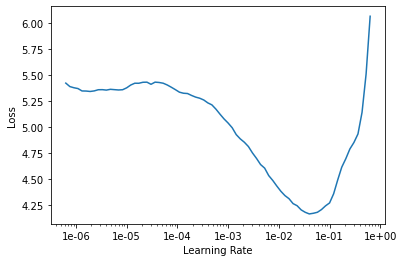

In [ ]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,2.326657,2.236089,0.456637,52:08
1,3.963928,25.403513,0.248316,52:04
2,4.121229,1860.544312,0.023294,53:43
3,3.430674,49.031643,0.345384,52:22
4,2.630791,70.399681,0.463706,52:27
5,2.009854,101.078827,0.517649,52:11
6,1.618672,26.725353,0.594886,52:09
7,1.502686,61.917686,0.606794,52:19


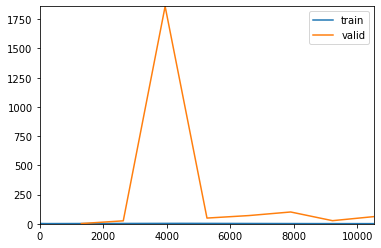

In [ ]:
# while the inner layers are frozen, run through 8 epocs
learn.fit_one_cycle(8, max_lr=slice(1e-2, 1e-1))

In [ ]:
export_learner(learn, 'stage-1')

Saved all models from .//train/train//models/ to /content/drive/My Drive/modelBackup/productclass_jin_fastai-resnet50_20200621/
Saved all exports from .//train/train//exports/ to /content/drive/My Drive/modelBackup/productclass_jin_fastai-resnet50_20200621/


In [ ]:
# evaluate results

interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

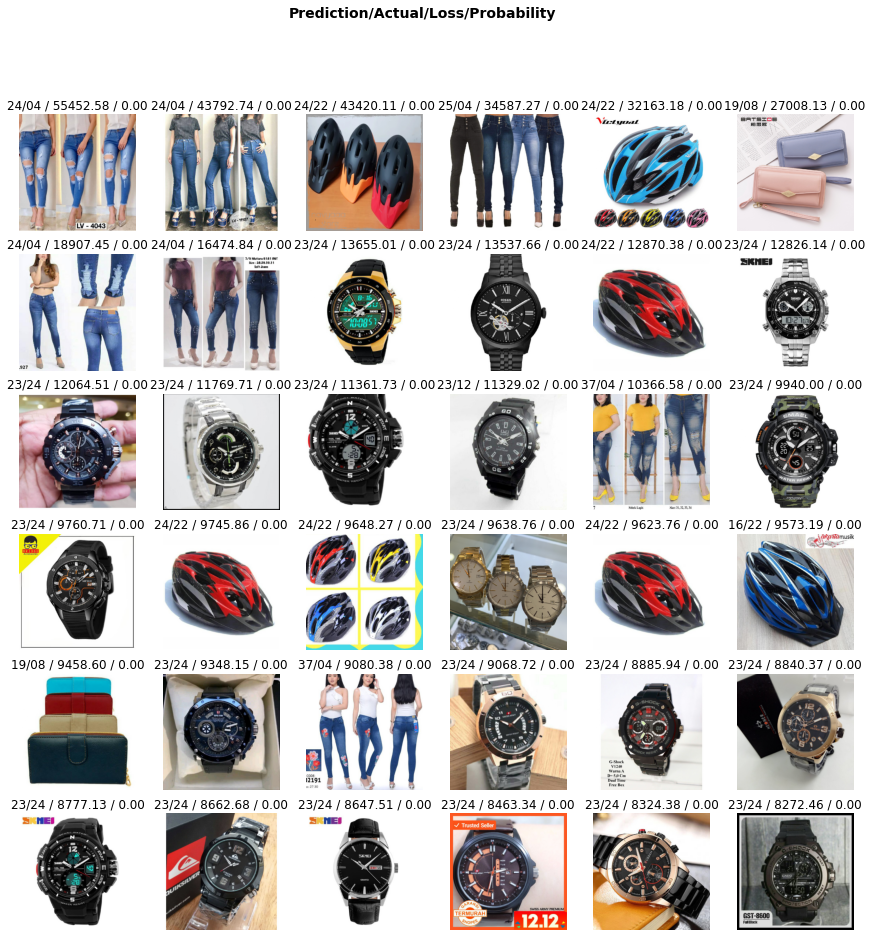

In [ ]:
# plot top losses
interp.plot_top_losses(36, figsize=(15,15))

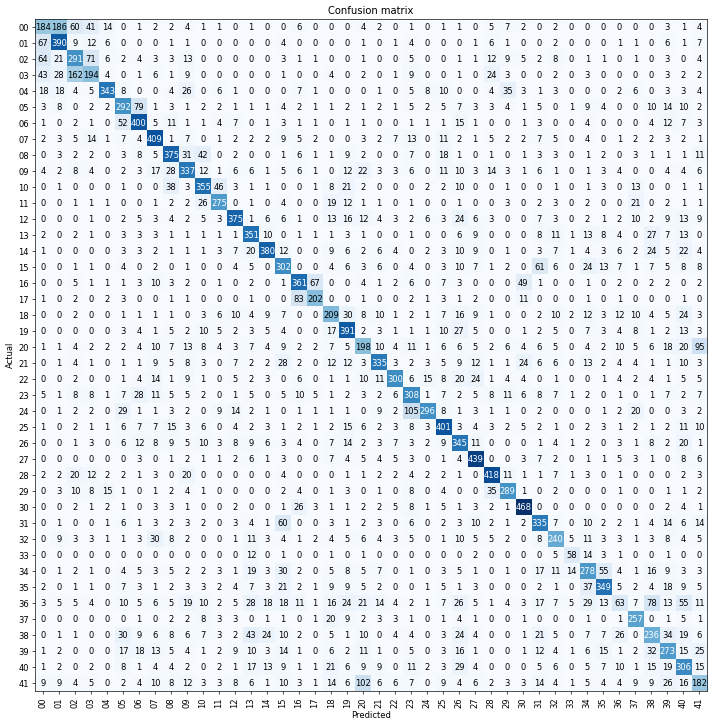

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
# Let's see where the algorithm is making the most mistakes:
interp.most_confused(min_val=2)

[('00', '01', 186),
 ('03', '02', 162),
 ('24', '23', 105),
 ('41', '20', 102),
 ('20', '41', 95),
 ('17', '16', 83),
 ('05', '06', 79),
 ('36', '38', 78),
 ('02', '03', 71),
 ('01', '00', 67),
 ('16', '17', 67),
 ('02', '00', 64),
 ('15', '31', 61),
 ('00', '02', 60),
 ('31', '15', 60),
 ('34', '35', 55),
 ('36', '40', 55),
 ('06', '05', 52),
 ('16', '30', 49),
 ('10', '11', 46),
 ('03', '00', 43),
 ('38', '13', 43),
 ('08', '10', 42),
 ('00', '03', 41),
 ('10', '08', 38),
 ('35', '34', 37),
 ('04', '29', 35),
 ('29', '28', 35),
 ('38', '39', 34),
 ('39', '38', 32),
 ('08', '09', 31),
 ('18', '19', 30),
 ('32', '07', 30),
 ('34', '15', 30),
 ('38', '05', 30),
 ('24', '05', 29),
 ('36', '34', 29),
 ('40', '26', 29),
 ('03', '01', 28),
 ('09', '08', 28),
 ('21', '15', 28),
 ('23', '06', 28),
 ('36', '13', 28),
 ('13', '38', 27),
 ('19', '26', 27),
 ('04', '09', 26),
 ('11', '10', 26),
 ('30', '16', 26),
 ('36', '26', 26),
 ('38', '36', 26),
 ('41', '39', 26),
 ('39', '41', 25),
 ('03', 

In [ ]:
# output confusion matrix to CSV
confusion_matrix_array = interp.confusion_matrix()

from numpy import savetxt
savetxt('confusion_matrix.csv', confusion_matrix_array, delimiter=',')

In [ ]:
top_losses_paths = [data.valid_ds.x.items[index] for index in idxs]
with open("output.txt", "w") as txt_file:
    for line in data:
        txt_file.write(" ".join(line) + "\n") 

'.//train/train//exports/stage-1.pkl'

In [ ]:
## resume here

In [ ]:
# load back stage 1
learn = learn.load('stage-1')

In [ ]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 150, 150]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 150, 150]       128        True      
______________________________________________________________________
ReLU                 [64, 150, 150]       0          False     
______________________________________________________________________
MaxPool2d            [64, 75, 75]         0          False     
______________________________________________________________________
Conv2d               [64, 75, 75]         4,096      False     
______________________________________________________________________
BatchNorm2d          [64, 75, 75]         128        True      
______________________________________________________________________
Conv2d               [64, 75, 75]         36,864     False     
___________________________________________________

In [ ]:
# now that the last layer's weight actually does something meaningful, we will now unfreeze all layers
# this will allow all layer's weights to be updated (during the backward pass of the training)
# this should help to further improve accuaracy... we will see
learn.unfreeze()

In [ ]:
# try a version that starts out unforzen, as validation loss is quite high

# create the learner (resnet50)
learn = cnn_learner(data, models.resnet50, metrics=[accuracy], callback_fns=ShowGraph)

learn.unfreeze()

In [ ]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 150, 150]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 150, 150]       128        True      
______________________________________________________________________
ReLU                 [64, 150, 150]       0          False     
______________________________________________________________________
MaxPool2d            [64, 75, 75]         0          False     
______________________________________________________________________
Conv2d               [64, 75, 75]         4,096      True      
______________________________________________________________________
BatchNorm2d          [64, 75, 75]         128        True      
______________________________________________________________________
Conv2d               [64, 75, 75]         36,864     True      
___________________________________________________

In [ ]:
# Check if the optimal learning rate has changed
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: ignored

epoch,train_loss,valid_loss,accuracy,time
0,1.871774,1.274675,0.673925,56:05
1,1.361169,1.020903,0.729244,56:33
2,1.154003,0.917896,0.755385,55:54
3,0.976353,0.861547,0.771041,55:57
4,0.847151,0.837869,0.777351,54:35
5,0.817932,0.829123,0.779770,54:27


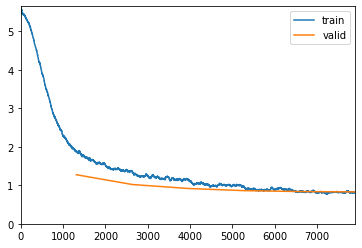

In [ ]:
# Continue training, but now with new learning rate
learn.fit_one_cycle(6, max_lr=slice(1e-5, 1e-4))

In [ ]:
export_learner(learn, 'stage-1u')

Saved all models from .//train/train//models/ to /content/drive/My Drive/modelBackup/productclass_jin_fastai-resnet50_20200621/
Saved all exports from .//train/train//exports/ to /content/drive/My Drive/modelBackup/productclass_jin_fastai-resnet50_20200621/


In [ ]:
# evaluate results

interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

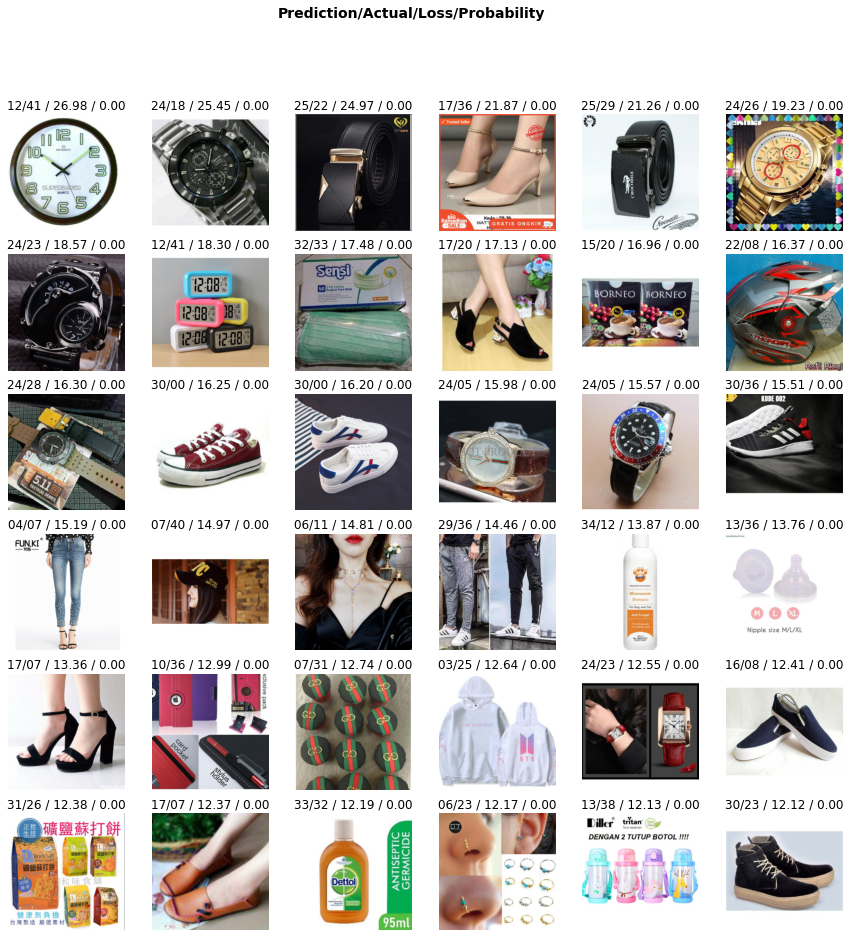

In [ ]:
# plot top losses
interp.plot_top_losses(36, figsize=(15,15))

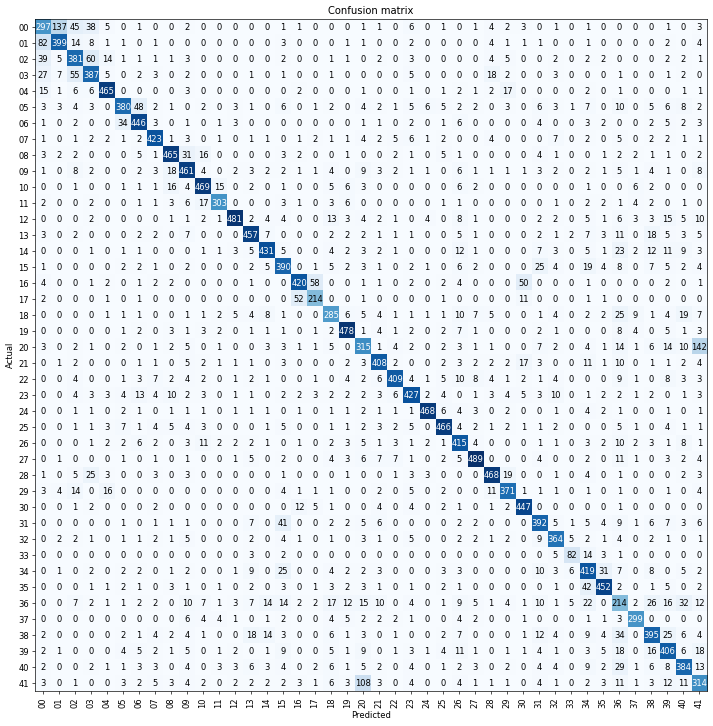

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
# Let's see where the algorithm is making the most mistakes:
interp.most_confused(min_val=2)

[('20', '41', 142),
 ('00', '01', 137),
 ('41', '20', 108),
 ('01', '00', 82),
 ('02', '03', 60),
 ('16', '17', 58),
 ('03', '02', 55),
 ('17', '16', 52),
 ('16', '30', 50),
 ('05', '06', 48),
 ('00', '02', 45),
 ('35', '34', 42),
 ('31', '15', 41),
 ('02', '00', 39),
 ('00', '03', 38),
 ('06', '05', 34),
 ('38', '36', 34),
 ('36', '40', 32),
 ('08', '09', 31),
 ('34', '35', 31),
 ('40', '36', 29),
 ('03', '00', 27),
 ('36', '38', 26),
 ('15', '31', 25),
 ('18', '36', 25),
 ('28', '03', 25),
 ('34', '15', 25),
 ('38', '39', 25),
 ('14', '36', 23),
 ('36', '34', 22),
 ('15', '34', 19),
 ('18', '40', 19),
 ('28', '29', 19),
 ('03', '28', 18),
 ('09', '08', 18),
 ('13', '38', 18),
 ('38', '13', 18),
 ('39', '36', 18),
 ('39', '41', 18),
 ('04', '29', 17),
 ('11', '10', 17),
 ('21', '30', 17),
 ('36', '18', 17),
 ('08', '10', 16),
 ('10', '08', 16),
 ('29', '04', 16),
 ('36', '39', 16),
 ('39', '38', 16),
 ('04', '00', 15),
 ('10', '11', 15),
 ('12', '39', 15),
 ('36', '20', 15),
 ('01', '

In [ ]:
top_losses_paths = [data.valid_ds.x.items[index] for index in idxs]
with open("top_losses_path.txt", "w") as txt_file:
  for line in top_losses_paths:
    txt_file.write(str(line) + "\n") 

In [ ]:
# load back stage 1
learn = learn.load('stage-1u')
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 150, 150]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 150, 150]       128        True      
______________________________________________________________________
ReLU                 [64, 150, 150]       0          False     
______________________________________________________________________
MaxPool2d            [64, 75, 75]         0          False     
______________________________________________________________________
Conv2d               [64, 75, 75]         4,096      True      
______________________________________________________________________
BatchNorm2d          [64, 75, 75]         128        True      
______________________________________________________________________
Conv2d               [64, 75, 75]         36,864     True      
___________________________________________________

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


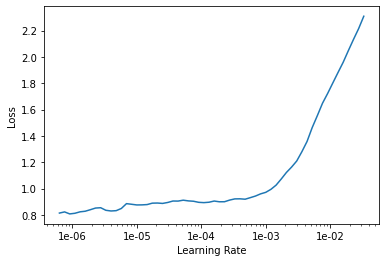

In [ ]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.842538,0.638580,0.820844,1:18:50
1,0.849499,0.639224,0.820559,1:17:39
2,0.865382,0.638988,0.820701,1:19:14
3,0.797744,0.634879,0.822268,1:17:27
4,0.803522,0.635836,0.822220,1:16:10
5,0.819504,0.634015,0.820464,1:17:59


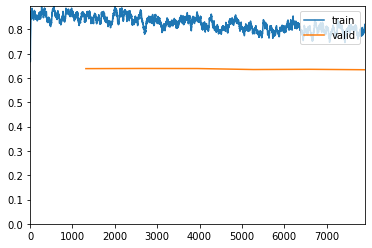

In [ ]:
# Continue training, but now with new learning rate
learn.fit_one_cycle(6, max_lr=slice(1e-6, 1e-5))

In [ ]:
export_learner(learn, 'stage-2u')

Saved all models from .//train/train//models/ to /content/drive/My Drive/modelBackup/productclass_jin_fastai-resnet50_20200621/
Saved all exports from .//train/train//exports/ to /content/drive/My Drive/modelBackup/productclass_jin_fastai-resnet50_20200621/


In [29]:
# load back stage 2u
learn = learn.load('stage-2u')
learn.unfreeze()
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 150, 150]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 150, 150]       128        True      
______________________________________________________________________
ReLU                 [64, 150, 150]       0          False     
______________________________________________________________________
MaxPool2d            [64, 75, 75]         0          False     
______________________________________________________________________
Conv2d               [64, 75, 75]         4,096      True      
______________________________________________________________________
BatchNorm2d          [64, 75, 75]         128        True      
______________________________________________________________________
Conv2d               [64, 75, 75]         36,864     True      
___________________________________________________

In [ ]:
# evaluate results

interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

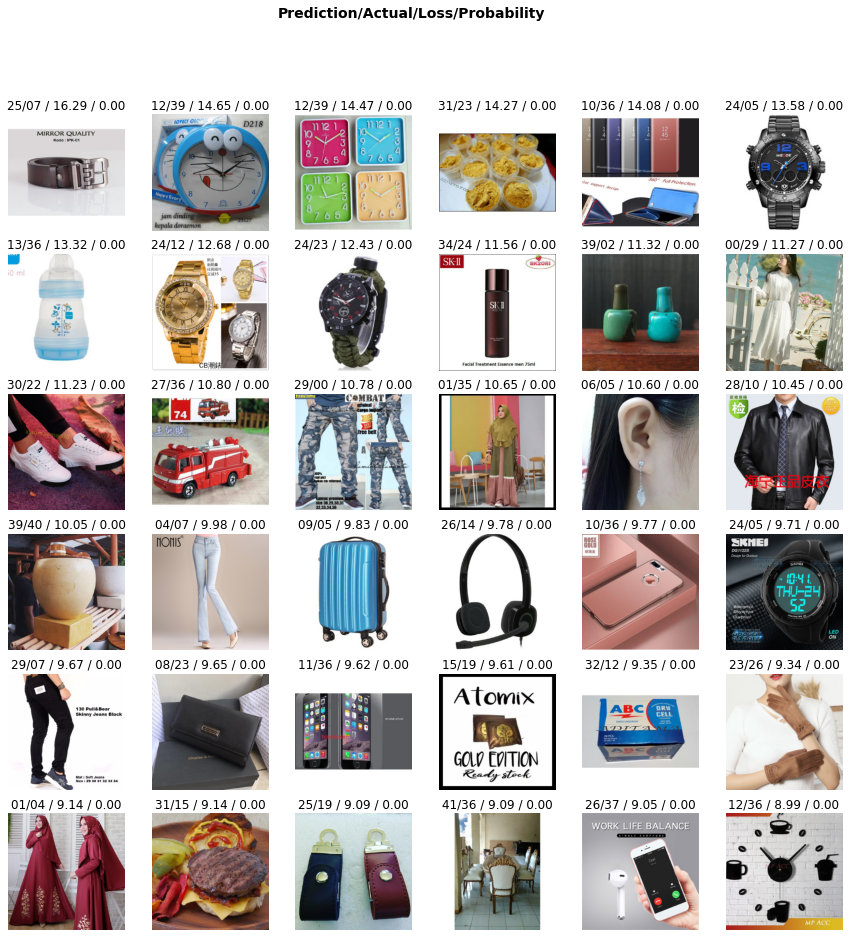

In [ ]:
# plot top losses
interp.plot_top_losses(36, figsize=(15,15))

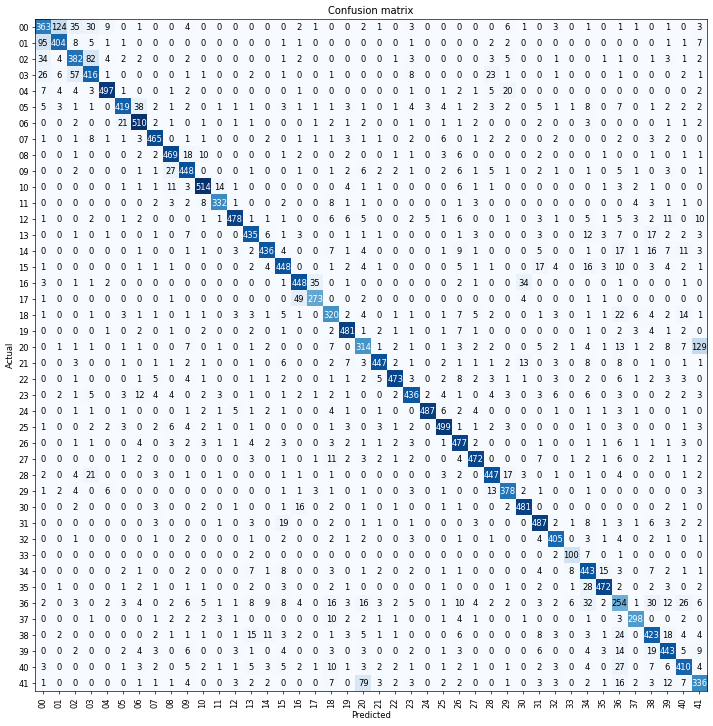

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
# Let's see where the algorithm is making the most mistakes:
interp.most_confused(min_val=2)

[('20', '41', 129),
 ('00', '01', 124),
 ('01', '00', 95),
 ('02', '03', 82),
 ('41', '20', 79),
 ('03', '02', 57),
 ('17', '16', 49),
 ('05', '06', 38),
 ('00', '02', 35),
 ('16', '17', 35),
 ('02', '00', 34),
 ('16', '30', 34),
 ('36', '34', 32),
 ('00', '03', 30),
 ('36', '38', 30),
 ('35', '34', 28),
 ('09', '08', 27),
 ('40', '36', 27),
 ('03', '00', 26),
 ('36', '40', 26),
 ('38', '36', 24),
 ('03', '28', 23),
 ('18', '36', 22),
 ('06', '05', 21),
 ('28', '03', 21),
 ('04', '29', 20),
 ('31', '15', 19),
 ('39', '38', 19),
 ('08', '09', 18),
 ('38', '39', 18),
 ('13', '38', 17),
 ('14', '36', 17),
 ('15', '31', 17),
 ('28', '29', 17),
 ('14', '38', 16),
 ('15', '34', 16),
 ('30', '16', 16),
 ('36', '18', 16),
 ('36', '20', 16),
 ('41', '36', 16),
 ('34', '35', 15),
 ('38', '13', 15),
 ('10', '11', 14),
 ('18', '40', 14),
 ('39', '36', 14),
 ('20', '36', 13),
 ('21', '30', 13),
 ('29', '28', 13),
 ('13', '34', 12),
 ('23', '06', 12),
 ('36', '39', 12),
 ('41', '39', 12),
 ('10', '0

In [ ]:
top_losses_paths = [data.valid_ds.x.items[index] for index in idxs]
with open("top_losses_path.txt", "w") as txt_file:
  for line in top_losses_paths:
    txt_file.write(str(line) + "\n") 

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


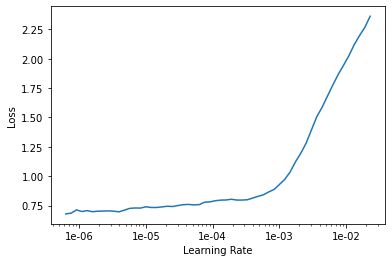

In [26]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.782656,0.597207,0.827193,1:17:50
1,0.786281,0.602894,0.826576,1:15:26
2,0.781053,0.603384,0.826814,1:11:42
3,0.809960,0.604077,0.825769,1:05:46
4,0.750194,0.603759,0.826149,1:05:04
5,0.751705,0.605026,0.825009,1:04:43


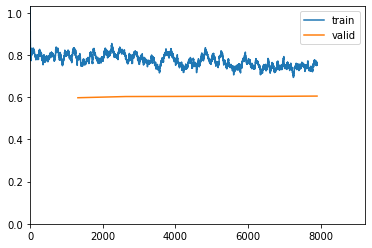

In [ ]:
# Continue training, but now with new learning rate
learn.fit_one_cycle(7, max_lr=slice(1e-6, 1e-5))

In [ ]:
export_learner(learn, 'stage-3u')

In [ ]:
# predict
# https://forums.fast.ai/t/how-to-add-test-data-to-imagedatabunch-and-predict-labels-for-test-data/46819
# https://stackoverflow.com/questions/56327207/not-able-to-predict-output-in-fastai

In [ ]:
# generate predictions
test_df = pd.read_csv(test_csv_filePath)
test_data = ImageList.from_df(test_df, test_images_folder)
data.add_test(test_data)
learn.data = data
preds = learn.get_preds(ds_type=DatasetType.Test)
preds_label_index = np.argmax(preds[0], 1)
test_df['category'] = preds_label_index
test_df.to_csv('predictions.csv', index=False)